In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from os import getcwd
getcwd()

'/Users/amichayoren/dev/time-series-analysis/analyzers'

In [43]:
folder='../datasets'
filename='bf_2019-09-13 20:19:49.617713.csv'

In [44]:
import csv

time_series = []
with open(f"{folder}/{filename}", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for x in row:
            try:
                time_series.append(float(x))
            except ValueError:
                pass

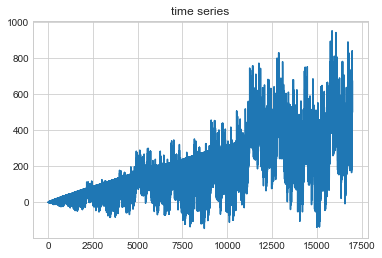

In [45]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

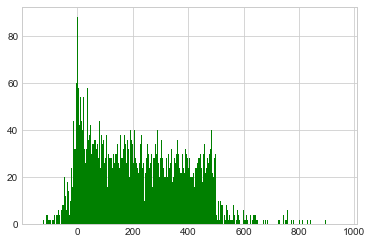

In [46]:
from math import ceil, floor
count, bins, ignored  = plt.hist(time_series, bins=int(ceil(max(time_series))-floor(min(time_series))), color='green')

In [47]:
import numpy as np
ts = np.array(time_series)

In [48]:
ts.mean()

221.1286219081272

In [49]:
ts.std()

175.52216009976271

In [50]:
def ACOV(X, h):
    avg = sum(X)/len(X)
    covv = [(X[t + h] - avg) * (X[t] - avg) for t in range (0, len(X) - h)]
    return (1.0 / len(X)) * sum(covv), np.array(covv).mean(), np.array(covv).std()

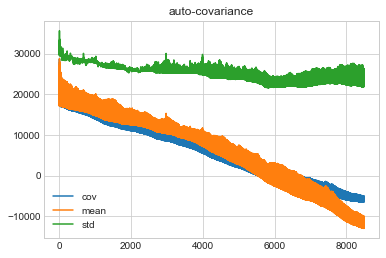

In [51]:
plt.title("auto-covariance")
acov = [ACOV(time_series,h) for h in range(1, int(len(time_series)/2))] 
plt.plot(list(zip(*acov))[0], label="cov")
plt.plot(list(zip(*acov))[1], label='mean')
plt.plot(list(zip(*acov))[2], label='std')
plt.legend()
plt.show()

In [52]:
def ACF(X, h):
    avg = sum(X)/len(X)
    covv = [(X[t + h] - avg) * (X[t] - avg) for t in range (0, len(X) - h)]
    var = [(X[t] - avg) ** 2 for t in range (0, len(X) - h)]
    return sum(covv) / sum(var)

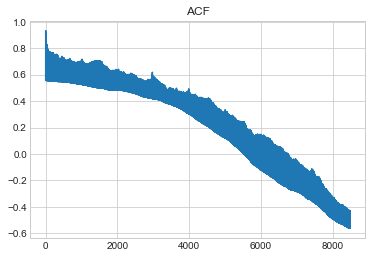

In [53]:
plt.title("ACF")
plt.plot([ACF(time_series, h) for h in range(1, int(len(time_series)/2))] )
plt.show()

In [ ]:
plt.title("ACF log-log")
plt.xscale("log")
plt.yscale("log")
plt.plot([ACF(time_series, h) for h in range(1, int(len(time_series)/2))] )
plt.show()